


*   Andrew - 1301180390




In [ ]:
#Import libraries
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#knn
from sklearn.neighbors import KNeighborsClassifier

#decision tree
from sklearn.tree import DecisionTreeClassifier

#svm
from sklearn import svm

#logistic regression
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/

/content/drive


In [ ]:
%cd MyDrive/Colab\ Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [ ]:
cd tubesML2/

[Errno 2] No such file or directory: 'tubesML2/'
/content/drive/MyDrive/Colab Notebooks


In [ ]:
!ls

kendaraan_test.csv  kendaraan_train.csv  malin	visdat


#DATA EXPLORATION

###Data Test

In [ ]:
DT = 'kendaraan_test.csv'
datatest = pd.read_csv(DT) 
datatest.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [ ]:
datatest.dtypes

Jenis_Kelamin        object
Umur                  int64
SIM                   int64
Kode_Daerah           int64
Sudah_Asuransi        int64
Umur_Kendaraan       object
Kendaraan_Rusak      object
Premi                 int64
Kanal_Penjualan       int64
Lama_Berlangganan     int64
Tertarik              int64
dtype: object

In [ ]:
datatest.shape

(47639, 11)

###Data Train

In [ ]:
DT = 'kendaraan_train.csv'
datatrain = pd.read_csv(DT) 
datatrain.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [ ]:
datatrain.dtypes

id                     int64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

In [ ]:
datatrain.shape

(285831, 12)

# PREPROCESSING

##Checking Missing Value

###Data Test

In [ ]:
datatest.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
datatest = datatest.dropna(how='any')
datatest.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

data sudah tidak memiliki missing value.

In [ ]:
datatest.describe

<bound method NDFrame.describe of       Jenis_Kelamin  Umur  SIM  ...  Kanal_Penjualan  Lama_Berlangganan Tertarik
0            Wanita    49    1  ...               26                145        0
1              Pria    22    1  ...              152                241        0
2              Pria    24    1  ...              152                 62        0
3              Pria    46    1  ...              124                 34        0
4              Pria    35    1  ...              152                229        0
...             ...   ...  ...  ...              ...                ...      ...
47634          Pria    61    1  ...              124                 67        0
47635          Pria    41    1  ...              157                232        0
47636          Pria    24    1  ...              152                211        0
47637          Pria    59    1  ...               26                239        1
47638          Pria    52    1  ...              124                170    

###Data Train

In [ ]:
datatrain.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [ ]:
datatrain = datatrain.dropna(how='any')
datatrain.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

data sudah tidak memiliki missing value.

In [ ]:
datatrain.describe

<bound method NDFrame.describe of             id Jenis_Kelamin  ...  Lama_Berlangganan  Tertarik
0            1        Wanita  ...               97.0         0
1            2          Pria  ...              158.0         0
3            4        Wanita  ...               63.0         0
5            6          Pria  ...              171.0         0
8            9        Wanita  ...               31.0         0
...        ...           ...  ...                ...       ...
285826  285827        Wanita  ...              217.0         0
285827  285828        Wanita  ...               50.0         0
285828  285829        Wanita  ...              226.0         0
285829  285830          Pria  ...              270.0         0
285830  285831          Pria  ...               44.0         0

[171068 rows x 12 columns]>

##Scalling

###Test

In [ ]:
datatest.replace(['< 1 Tahun','1-2 Tahun', '> 2 Tahun'],[1,2,3],inplace=True)
datatest.replace(['Pria', 'Wanita'],[1,0],inplace=True)
datatest.replace(['Pernah', 'Tidak'],[1,0],inplace=True)
datatest.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,49,1,8,0,2,1,46963,26,145,0
1,1,22,1,47,1,1,0,39624,152,241,0
2,1,24,1,28,1,1,0,110479,152,62,0
3,1,46,1,8,1,2,0,36266,124,34,0
4,1,35,1,23,0,2,1,26963,152,229,0


In [ ]:
#split data test untuk label
testtarget = datatest.iloc[:,[10]]

In [ ]:
testData = datatest.iloc[:,[0,1,2,3,4,5,6,7,8,9]]
testData.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0,49,1,8,0,2,1,46963,26,145
1,1,22,1,47,1,1,0,39624,152,241
2,1,24,1,28,1,1,0,110479,152,62
3,1,46,1,8,1,2,0,36266,124,34
4,1,35,1,23,0,2,1,26963,152,229


In [ ]:
#normalisasi data dengan minmaxscaler
Ndatatest = MinMaxScaler(feature_range=(0,1)).fit_transform(testData)
Ndatatest

array([[0.        , 0.44615385, 1.        , ..., 0.08247463, 0.15432099,
        0.46712803],
       [1.        , 0.03076923, 1.        , ..., 0.06882157, 0.93209877,
        0.79930796],
       [1.        , 0.06153846, 1.        , ..., 0.20063624, 0.93209877,
        0.1799308 ],
       ...,
       [1.        , 0.06153846, 1.        , ..., 0.05668654, 0.93209877,
        0.69550173],
       [1.        , 0.6       , 1.        , ..., 0.06540597, 0.15432099,
        0.79238754],
       [1.        , 0.49230769, 1.        , ..., 0.        , 0.75925926,
        0.55363322]])

###Train

In [ ]:
datatrain.replace(['< 1 Tahun','1-2 Tahun', '> 2 Tahun'],[1,2,3],inplace=True)
datatrain.replace(['Pria', 'Wanita'],[1,0],inplace=True)
datatrain.replace(['Pernah', 'Tidak'],[1,0],inplace=True)
datatrain.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0,30.0,1.0,33.0,1.0,1,0,28029.0,152.0,97.0,0
1,2,1,48.0,1.0,39.0,0.0,3,1,25800.0,29.0,158.0,0
3,4,0,58.0,1.0,48.0,0.0,2,0,2630.0,124.0,63.0,0
5,6,1,21.0,1.0,35.0,1.0,1,0,22735.0,152.0,171.0,0
8,9,0,20.0,1.0,8.0,1.0,1,0,30786.0,160.0,31.0,0


In [ ]:
#split data test untuk label
traintarget = datatrain.iloc[:,[11]]

In [ ]:
trainData = datatrain.iloc[:,[1,2,3,4,5,6,7,8,9,10]]
trainData.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0,30.0,1.0,33.0,1.0,1,0,28029.0,152.0,97.0
1,1,48.0,1.0,39.0,0.0,3,1,25800.0,29.0,158.0
3,0,58.0,1.0,48.0,0.0,2,0,2630.0,124.0,63.0
5,1,21.0,1.0,35.0,1.0,1,0,22735.0,152.0,171.0
8,0,20.0,1.0,8.0,1.0,1,0,30786.0,160.0,31.0


In [ ]:
#normalisasi data dengan minmaxscaler
Ndatatrain = MinMaxScaler(feature_range=(0,1)).fit_transform(trainData)
Ndatatrain

array([[0.        , 0.15384615, 1.        , ..., 0.04725088, 0.93209877,
        0.30103806],
       [1.        , 0.43076923, 1.        , ..., 0.04310417, 0.17283951,
        0.51211073],
       [0.        , 0.58461538, 1.        , ..., 0.        , 0.75925926,
        0.183391  ],
       ...,
       [0.        , 0.04615385, 1.        , ..., 0.08766127, 0.93209877,
        0.74740484],
       [1.        , 0.73846154, 1.        , ..., 0.05185337, 0.75925926,
        0.89965398],
       [1.        , 0.38461538, 1.        , ..., 0.06297264, 0.15432099,
        0.11764706]])

#CLASSIFICATION

##NAIVE BAYES

In [ ]:
accuracyArr = []
confusionmatrixArr = []
classificationreportArr = []

In [ ]:
# Naive Bayes

#train model dan predict  
NaiveBayes = GaussianNB().fit(Ndatatrain,traintarget)
NaiveBayes

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Naive Bayes
#menggunakan model untuk memprediksi test set
#returns array dari predicted results
NaiveBayesPredict = NaiveBayes.predict(Ndatatest)
NaiveBayesPredict

array([1, 0, 0, ..., 0, 1, 0])

###Confusion Matrix, Classification Report, Accuracy

In [ ]:
# Naive Bayes
confusionmatrix = metrics.confusion_matrix(testtarget, NaiveBayesPredict)
classificationreport = metrics.classification_report(testtarget, NaiveBayesPredict)
accuracy = metrics.accuracy_score(testtarget, NaiveBayesPredict)

confusionmatrixArr.append(confusionmatrix)
classificationreportArr.append(classificationreport)
accuracyArr.append(accuracy)

print("Confusion Matrix:","\n",confusionmatrix)
print("\nClassification Report:\n",classificationreport)
print("Accuracy:", accuracy)

Confusion Matrix: 
 [[24824 16954]
 [  148  5713]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.59      0.74     41778
           1       0.25      0.97      0.40      5861

    accuracy                           0.64     47639
   macro avg       0.62      0.78      0.57     47639
weighted avg       0.90      0.64      0.70     47639

Accuracy: 0.6410084174730788


##KNN

In [ ]:
# KNN
#train model, disini value knya yaitu 19
k = 19

#train model dan predict  
KNN = KNeighborsClassifier(n_neighbors = k).fit(Ndatatrain,traintarget)
KNN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [ ]:
# KNN
#menggunakan model untuk memprediksi test set
KNNPredict = KNN.predict(Ndatatest)
KNNPredict

array([0, 0, 0, ..., 0, 0, 0])

###Confusion Matrix, Classification Report, Accuracy

In [ ]:
# KNN
confusionmatrix = metrics.confusion_matrix(testtarget, KNNPredict)
classificationreport = metrics.classification_report(testtarget, KNNPredict)
accuracy = metrics.accuracy_score(testtarget, KNNPredict)

confusionmatrixArr.append(confusionmatrix)
classificationreportArr.append(classificationreport)
accuracyArr.append(accuracy)

print("Confusion Matrix:","\n",confusionmatrix)
print("\nClassification Report:\n",classificationreport)
print("\nAccuracy:", accuracy)

Confusion Matrix: 
 [[41152   626]
 [ 5477   384]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     41778
           1       0.38      0.07      0.11      5861

    accuracy                           0.87     47639
   macro avg       0.63      0.53      0.52     47639
weighted avg       0.82      0.87      0.83     47639


Accuracy: 0.8718906778059993


##DECISION TREE

In [ ]:
# Decision Tree

#train model dan predict  
DesicionTree = DecisionTreeClassifier().fit(Ndatatrain,traintarget)
DesicionTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Decision Tree
#menggunakan model untuk memprediksi test set
DesicionTreePredict = DesicionTree.predict(Ndatatest)
DesicionTreePredict

array([0, 0, 0, ..., 0, 0, 0])

###Confusion Matrix, Classification Report, Accuracy

In [ ]:
# Decision Tree
confusionmatrix = metrics.confusion_matrix(testtarget, DesicionTreePredict)
classificationreport = metrics.classification_report(testtarget, DesicionTreePredict)
accuracy = metrics.accuracy_score(testtarget, DesicionTreePredict)

confusionmatrixArr.append(confusionmatrix)
classificationreportArr.append(classificationreport)
accuracyArr.append(accuracy)

print("Confusion Matrix:","\n",confusionmatrix)
print("\nClassification Report:\n",classificationreport)
print("\nAccuracy:", accuracy)

Confusion Matrix: 
 [[37377  4401]
 [ 4049  1812]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90     41778
           1       0.29      0.31      0.30      5861

    accuracy                           0.82     47639
   macro avg       0.60      0.60      0.60     47639
weighted avg       0.83      0.82      0.82     47639


Accuracy: 0.8226243204097483


##SUPPORT VECTOR MACHINE

In [ ]:
# Support Vector Machine

#train model dan predict  
SupportMachineVector = svm.SVC(kernel='linear').fit(Ndatatrain,traintarget)
SupportMachineVector

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Support Vector Machine
#menggunakan model untuk memprediksi test set
SupportMachineVectorPredict = SupportMachineVector.predict(Ndatatest)
SupportMachineVectorPredict

array([0, 0, 0, ..., 0, 0, 0])

###Confusion Matrix, Classification Report, Accuracy

In [ ]:
# Support Vector Machine
confusionmatrix = metrics.confusion_matrix(testtarget, SupportMachineVectorPredict)
classificationreport = metrics.classification_report(testtarget, SupportMachineVectorPredict)
accuracy = metrics.accuracy_score(testtarget, SupportMachineVectorPredict)

confusionmatrixArr.append(confusionmatrix)
classificationreportArr.append(classificationreport)
accuracyArr.append(accuracy)

print("Confusion Matrix:","\n",confusionmatrix)
print("\nClassification Report:\n",classificationreport)
print("\nAccuracy:", accuracy)

Confusion Matrix: 
 [[41778     0]
 [ 5861     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.00      0.00      0.00      5861

    accuracy                           0.88     47639
   macro avg       0.44      0.50      0.47     47639
weighted avg       0.77      0.88      0.82     47639


Accuracy: 0.8769705493398267


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##LOGISTIC REGRESSION

In [ ]:
# Logistic Regression

#train model dan predict  
LogiscticRegression = LogisticRegression().fit(Ndatatrain,traintarget)
LogiscticRegression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Logistic Regression
#menggunakan model untuk memprediksi test set
LogiscticRegressionPredict = LogiscticRegression.predict(Ndatatest)
LogiscticRegressionPredict

array([0, 0, 0, ..., 0, 0, 0])

###Confusion Matrix, Classification Report, Accuracy

In [ ]:
# Logistic Regression
confusionmatrix = metrics.confusion_matrix(testtarget, LogiscticRegressionPredict)
classificationreport = metrics.classification_report(testtarget, LogiscticRegressionPredict)
accuracy = metrics.accuracy_score(testtarget, LogiscticRegressionPredict)

confusionmatrixArr.append(confusionmatrix)
classificationreportArr.append(classificationreport)
accuracyArr.append(accuracy)

print("Confusion Matrix:","\n",confusionmatrix)
print("\nClassification Report:\n",classificationreport)
print("\nAccuracy:", accuracy)

Confusion Matrix: 
 [[41738    40]
 [ 5840    21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.34      0.00      0.01      5861

    accuracy                           0.88     47639
   macro avg       0.61      0.50      0.47     47639
weighted avg       0.81      0.88      0.82     47639


Accuracy: 0.8765717164508071


#VISUALIZATION

In [ ]:
ArrMethod = ['Naive Bayes','KNN','Desicion Tree','SVM','Logistic Regression']

In [ ]:
accuracyV = pd.DataFrame(accuracyArr, columns=['Akurasi'])
accuracyV['Metode']=ArrMethod
accuracyV = accuracyV.sort_values(by='Akurasi', ascending=False)
accuracyV

,Akurasi,Metode
3,0.876971,SVM
4,0.876572,Logistic Regression
1,0.871891,KNN
2,0.822624,Desicion Tree
0,0.641008,Naive Bayes


###Graph Comparison

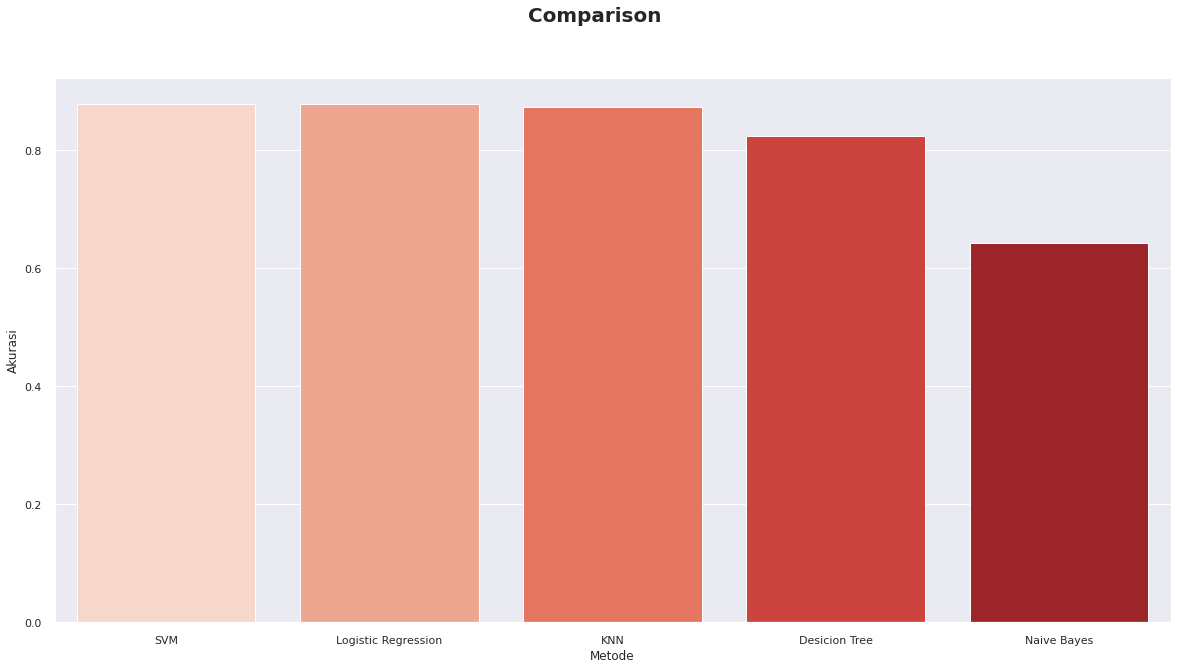

In [ ]:
# Akurasi
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')
sns.set(rc={'figure.facecolor':'white'})
sns.set_palette('Accent')

fig, (ax1) = plt.subplots(1)
fig.suptitle('Comparison', fontsize=20, fontweight='bold')
fig.set_figheight(10)
fig.set_figwidth(20)
fig.set_facecolor('white')
sns.barplot(data=accuracyV, x='Metode',y='Akurasi',palette = "Reds")